
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The dataset contains information on 100,000 medical appointments in Brazil, focusing on whether patients attended their scheduled appointments. Each row in the dataset represents a unique appointment and includes several patient-related attributes:

PatientId: A unique identifier assigned to each patient.
AppointmentID: A unique identifier for each appointment.
Gender: Indicates whether the patient is male or female.
AppointmentDay: The date when the patient is supposed to see the doctor.
ScheduledDay: The date when the appointment was initially booked, which is naturally before the appointment date.
Age: The patient's age.
Neighborhood: The location of the medical facility where the appointment is scheduled.
Scholarship: A boolean value indicating whether the patient is enrolled in a social welfare program (related to the Bolsa Família initiative).
Hypertension: Indicates whether the patient has hypertension
Diabetes: Indicates whether the patient has diabetes.
Alcoholism: Indicates whether the patient has a history of alcoholism 
Disability: Indicates whether the patient has any disabilities
SMS_received: Indicates whether the patient received one or more SMS reminders.
No-show: A boolean value indicating whether the patient missed the appointment 



### Question(s) for Analysis

1)  What charactaristic does most of the diabetes patients have?
2)is there a difference of attending rate considering their age and that they have a scholarship program and that they have recieved an sms message?
 

In [41]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt

# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling




### General Properties
import the libraries and take a look at the data

In [42]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")## load the data
df.head() ##load the first rows to see what it looks like
df.shape ## the size of the data
df.info() ## the data types and to check if there is missing values

df.describe() ## to see if the data have unrealistic values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning

 

In [43]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
for c in ["Scholarship", "Hipertension","Diabetes","Alcoholism","Handcap","SMS_received"]: ## i've noticed that the unique values of these columns are 1 and 0, so i changed the data type to int8 to save some memory space 
    df[c]= df[c].astype("int8")
    
df["PatientId"]= df["PatientId"].astype("int") ##i've noticed that the values of the patient id are intiger values, so i converted the data type from float to intiger



for c in ["ScheduledDay", "AppointmentDay"]: ##i've noticed that these columns are object type istead of datetime, so i decided to convert them
    df[c] = pd.to_datetime(df[c])
    
    
    
df.duplicated().sum() ## to see if the data have duplicates
df.isnull().sum() ## to see if the data have missing values
df_clean= df[df["Age"] >=0] ## i've noticed after using .describe() method, that the data have a min age of -1, so i decided to filter the data to remove any row that have the value of age under 0

In [44]:
df_clean.head() ## to take a look of the cleaned data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis




### What charactaristic does most of the diabetes patients have?

In [45]:
def calculate_diabetes_proportion(df, df_full, G): ## a function to calcualte proportion
    
    # Count the number of female patients with diabetes
    Number = df["Gender"].value_counts().get(G, 0)
    
    # Count the total number of female patients
    total = df_full["Gender"].value_counts().get(G, 0)
    
    # Calculate the proportion
    if total == 0:  # Avoid division by zero
        return 0.0
    
    proportion = Number / total
    return proportion






In [46]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_diabetes = df_clean[df_clean["Diabetes"] == 1] ## to filter the data to have only the people who have diabetes

df_fdiabetes = df_diabetes[df_diabetes["Gender"] == "F"] ## to filter the data to have only the females who have diabetes
df_f = df_clean[df_clean["Gender"] == "F"] ## to filter the data to have only the females patients
df_Mdiabetes = df_diabetes[df_diabetes["Gender"] == "M"] ## to filter the data to have only the males who have diabetes
df_m = df_clean[df_clean["Gender"] == "M"] ## to filter the data to have only the males patients
 

df_FdiabetesMean = calculate_diabetes_proportion(df_fdiabetes, df_f, "F")
df_MdiabetesMean = calculate_diabetes_proportion(df_Mdiabetes, df_m, "M")
##to calculate the proportion of female patient who have diabetes
##to calculate the proportion of male patient who have diabetes

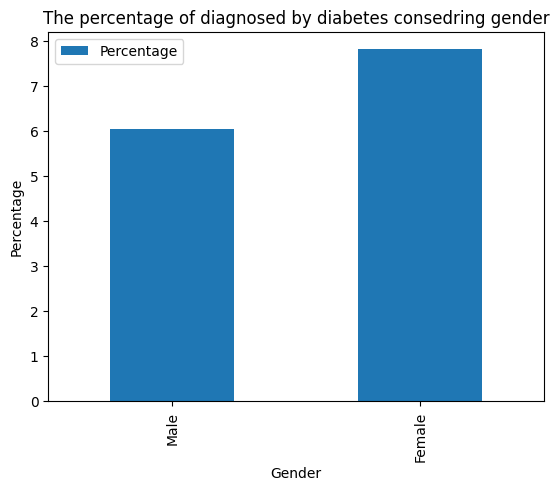

In [47]:
data_diabetes = pd.DataFrame({
    'Gender': ["Male", "Female"],
    'Percentage': [df_MdiabetesMean * 100, df_FdiabetesMean * 100]
})

data_diabetes.set_index('Gender', inplace=True)


data_diabetes.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('The percentage of diagnosed by diabetes consedring gender')
plt.show()
## to draw a graph showing the percentage of female proportion and male proportion patients who have diabetes

The data shows that females who are diagnosed with diabetes are more than the males who are diagnosed with diabetes by approximately 2%, but this is a minor difference it should not be considered a charactaristic of diabetes people

<AxesSubplot: title={'center': 'Percentage of Diabetes and Hipertension diseases'}, ylabel='Hipertension'>

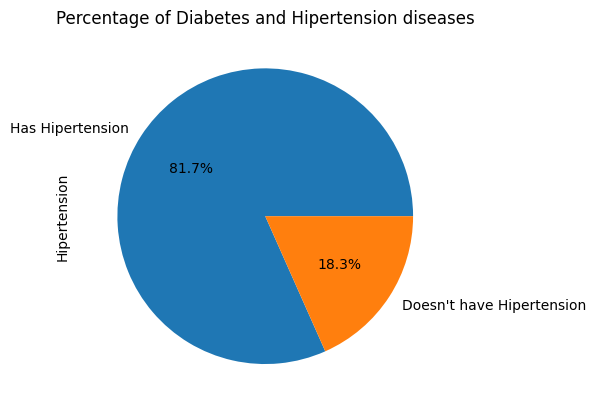

In [48]:
df_diabetes["Hipertension"].value_counts().plot(kind="pie" ,labels=['Has Hipertension', "Doesn't have Hipertension"], autopct='%1.1f%%',title="Percentage of Diabetes and Hipertension diseases")
## draw a graph of the percentage of people who have diabetes and hipertension and include percentage to have a clear idea of it

The data shows that 81.7% of diabetes patients also have hipertension, which is an index that the hipertension and diabetes have a strong relation

Text(0.5, 0, 'Age')

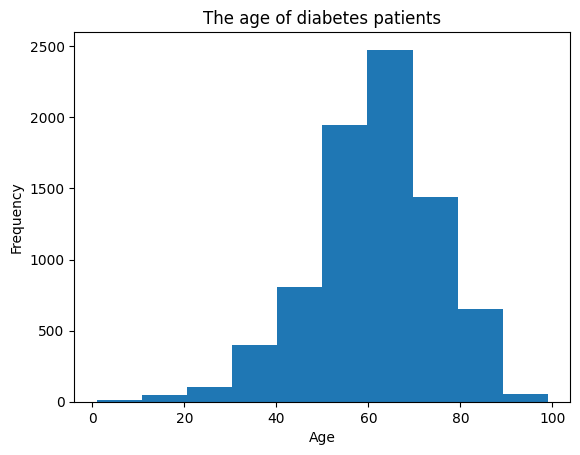

In [49]:
df_diabetes["Age"].plot(kind="hist" ,title="The age of diabetes patients").set_xlabel('Age')
## draw a histogram of age to see if age have a relation and what age most of people have diabetes

The data shows that most of the people who have diabetes are from the age of 50 to 75, which is an index that being old and diabetes have a relation

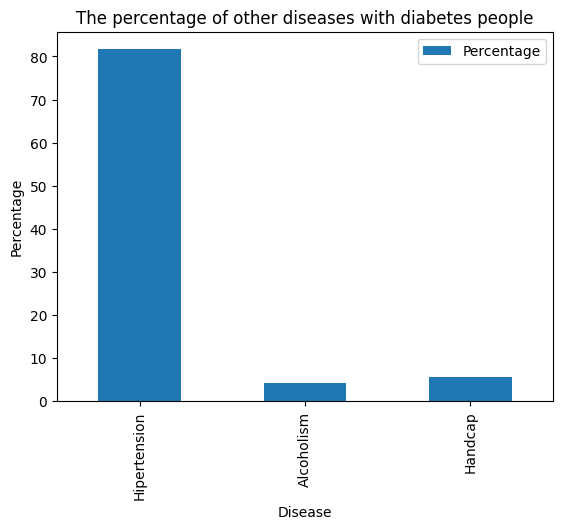

In [50]:
data = pd.DataFrame({
    'Disease': ["Hipertension", "Alcoholism", "Handcap"],
    'Percentage': [0.816568*100, 0.041798*100, 0.055646*100]
})

data.set_index('Disease', inplace=True)


data.plot(kind='bar')
plt.xlabel('Disease')
plt.ylabel('Percentage')
plt.title('The percentage of other diseases with diabetes people')
plt.show()
## to draw a bar graph to see what the percentage of other diseas with daibetes that patient can have

The data shows that only hipertenstion is a real threat to a diabetes patient

in conclusion, getting old and having hipertension are charactaristic of a diabetes patient, and a strong sign that the person who have these charactaristic also have diabetes

### is there a difference of attending rate considering their age and that they have a scholarship program and that they have recieved an sms message?

In [51]:
df_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<AxesSubplot: title={'center': "The percentage of people who didn't recieve an sms and attended their appointments"}>

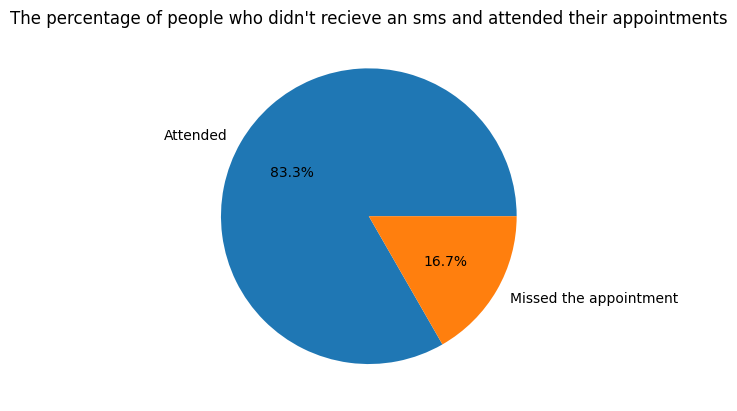

In [52]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

df_sms = df_clean[df_clean["SMS_received"] == 1] ##to filter the data to have only the people who recieved sms message

df_nosms = df_clean[df_clean["SMS_received"] == 0]##to filter the data to have only the people who didn't recieved sms message

df_nosms["No-show"].value_counts().plot(kind="pie", labels=['Attended', "Missed the appointment"], autopct='%1.1f%%',title="The percentage of people who didn't recieve an sms and attended their appointments", label="")
## to draw a graph of the percentage of the people who didn't recieve an sms message and attended their appointment

<AxesSubplot: title={'center': 'The percentage of people who recived sms and attended their appointments'}>

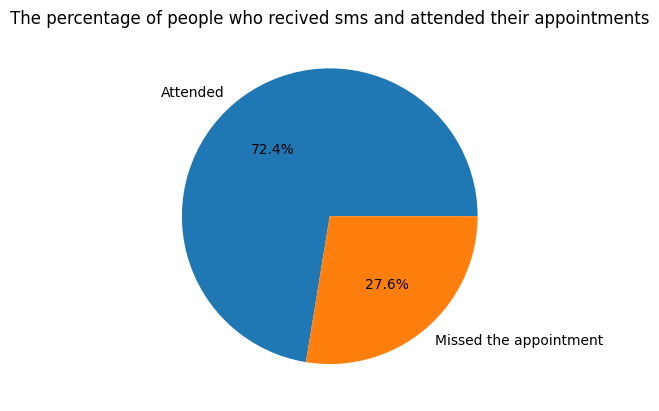

In [53]:
df_sms["No-show"].value_counts().plot(kind="pie", labels=['Attended', "Missed the appointment"], autopct='%1.1f%%',title="The percentage of people who recived sms and attended their appointments", label="")
## to draw a graph of the percentage of the people who didn't recieve an sms message and attended their appointment

The Data shows that the people who recieve an sms for their appointment are more likely to mis their appointment than the ones who didn't recieve an sms, as a result sending an sms message is not a factor that can help people to attend their appointments

<AxesSubplot: title={'center': 'The percentage of people who dont have a scholarship and attended their appointments'}>

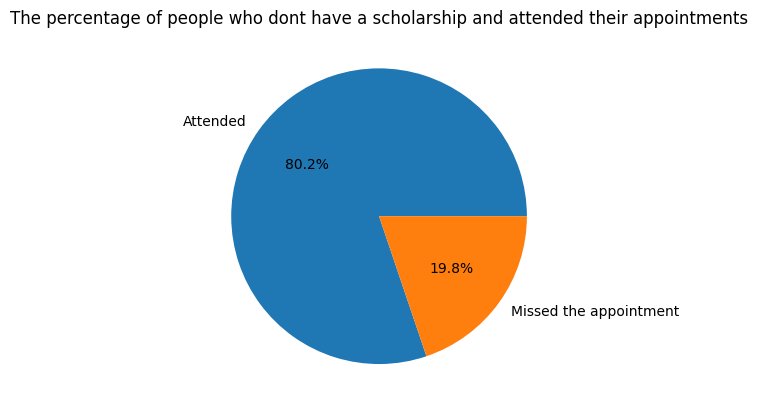

In [54]:
df_scolar = df_clean[df_clean["Scholarship"] == 1] ##to filter the data to only have the people who have scholarship 
df_noscolar = df_clean[df_clean["Scholarship"] == 0]##to filter the data to only have the people who don't have scholarship 

df_noscolar["No-show"].value_counts().plot(kind="pie", labels=['Attended', "Missed the appointment"], autopct='%1.1f%%',title="The percentage of people who dont have a scholarship and attended their appointments", label="")
##to draw a graph of the percentage of the people who doens't have scholarship and attended their appointment

<AxesSubplot: title={'center': 'The percentage of people who have a scholarship and attended their appointments'}>

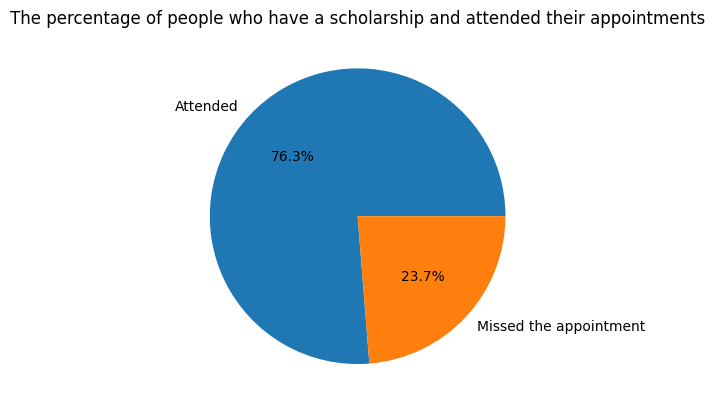

In [55]:
df_scolar["No-show"].value_counts().plot(kind="pie", labels=['Attended', "Missed the appointment"], autopct='%1.1f%%',title="The percentage of people who have a scholarship and attended their appointments", label="")
####to draw a graph of the percentage of the people who have scholarship and attended their appointment

The data shows that the percentage of people that dont have a scholarship are more likley to attend there appointment that the ones who does have a scholarship, AS a result having a scholarship is not a factor that can help pateints to attend their appointments.

In [56]:
def calculate_no_show_proportion(df, no_show_value='No', show_value='Yes'): ## a function to calculate proportion
    
    # Count the number of occurrences of no_show_value
    no_show_count = df["No-show"].value_counts().get(no_show_value, 0)
    
    # Count the number of occurrences of show_value
    show_count = df["No-show"].value_counts().get(show_value, 0)
    
    # Calculate the total count
    total_count = no_show_count + show_count
    
    # Calculate the proportion
    if total_count == 0:  # Avoid division by zero
        return 0.0
    
    proportion = no_show_count / total_count
    return proportion




In [57]:
df1 = df_clean[(df_clean["Scholarship"] == 1) & df_clean["SMS_received"] ==1] ## filter the data to only have the one that have a scholarship and recieved an sms message
df2 = df_clean[(df_clean["Scholarship"] == 0) & df_clean["SMS_received"] ==1]## filter the data to only have the one that don't have a scholarship and recieved an sms message
df3 = df_clean[(df_clean["Scholarship"] == 1) & df_clean["SMS_received"] ==0]## filter the data to only have the one that have a scholarship and didn't recieved an sms message
df4 = df_clean[(df_clean["Scholarship"] == 0) & df_clean["SMS_received"] ==0]## filter the data to only have the one that don't have a scholarship and didn't recieved an sms message

df1_mean = calculate_no_show_proportion(df1, no_show_value='No', show_value='Yes') ## to have the propotion of attending the appointment from the people who have a scholarship and recieved an sms message
df2_mean = calculate_no_show_proportion(df2, no_show_value='No', show_value='Yes')## to have the propotion of attending the appointment from the people who don't have a scholarship and recieved an sms message
df3_mean = calculate_no_show_proportion(df3, no_show_value='No', show_value='Yes')## to have the propotion of attending the appointment from the people who have a scholarship and didn't recieved an sms message
df4_mean = calculate_no_show_proportion(df4, no_show_value='No', show_value='Yes') ## to have the propotion of attending the appointment from the people who don't have a scholarship and didn't recieved an sms message


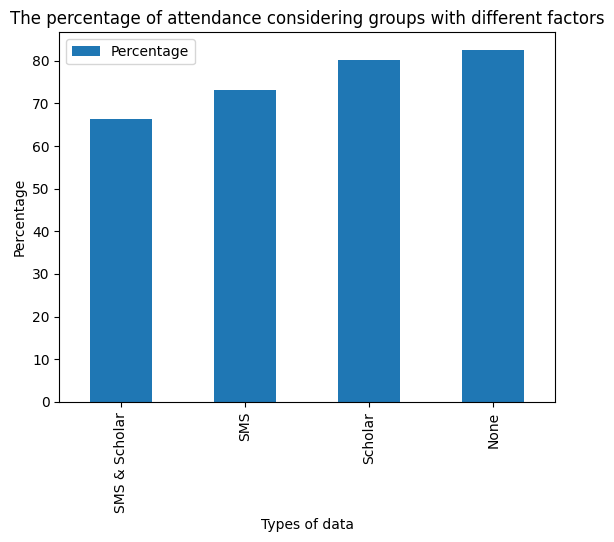

In [58]:
data = pd.DataFrame({
    'Types of data': ["SMS & Scholar", "SMS", "Scholar", "None"],
    'Percentage': [df1_mean * 100, df2_mean * 100, df3_mean  * 100, df4_mean * 100]
})

data.set_index('Types of data', inplace=True)


data.plot(kind='bar')
plt.xlabel('Types of data')
plt.ylabel('Percentage')
plt.title('The percentage of attendance considering groups with different factors')
plt.show()
## to draw a graph representing the percentage of attendance of each group

The data shows that the people who don't have scholarship program and did'nt recieve an sms message are more likely to attend their appointment then the one who have both of these factors, in fact who have both of these factors are more likely to miss their appointment than any other people, this might sounds weird but it actually can be like that for many reasons, maybe the content of the sms message are not motivating the patients or maybe the time of sending the message is bad, and maybe most of the people who have the scholarship program are poor and they might dont have a transportation way to get to the hospital.

<a id='conclusions'></a>
## Conclusions
1-The answer of the first question (What charactaristic does most of the diabetes patients have?) is that they have these 2 common charactaristic, diagnosed with Hipertension, and that they are between the age 50-75. i have got to this conclusion after i have seen the result of the analysis and filtering the data, the result of the analysis that i have applied  is that 81.7% of the people who have diabetes are also diagnosed with Hipertension, and that the majority of the people who are diagnosed with diabetes are between the age of 50-75 (from the graph). this data suggests that i you have these charactaristic you are likely to also have diabetes. and it worth to metion that i have done an analysis to see if there is a difference between the proportions of the female and males that are diagnosed with diabetes, and i found that female proportion are higher by 2%, but since its a minor difference it is propably not a charactaristic of diabetes patients.

2-The answer of the seccond question (is there a difference of attending rate considering their age and that they have a scholarship program and that they have recieved an sms message?)after applying some statistics and analysis to the data and seprating each group with a dataset, is that sending an sms message and having a scholarship program can negatively impact in the rate of attendance and that they are the lowest group of attendance rate. and the group that didn't received an sms message and also don't have a scholarship program are the ones who have the highest attendance rate. and the second highest attendance rate group are the ones who didn't recieve an sms message and have a scholarship. then the third highest attendance group are the ones who only received an sms message. this suggests that it is better to avoide sending sms messages or that it have a problem with content or other reasons with the message, and having a scholarship also can negatively impact the attendane rate, it might be because of some problems that they face related to the scholarship program

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [59]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 626008 bytes to Investigate_a_Dataset.html
